In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [15]:
import numpy as np # linear algebra
import pandas as pd 

In [16]:
data=pd.read_csv('stock_data.csv')
data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [18]:
data.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [19]:
duplicate=data[data.duplicated()]
duplicate

,Text,Sentiment


In [20]:
data['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
corpus=[]
for i in range(len(data)):
    words=data.iloc[i,0]
    words=re.sub('[^a-zA-Z]',' ',words)
    words=words.lower()
    words=words.split()
    words=[PorterStemmer().stem(word) for word in words if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(words))

In [24]:
vec=CountVectorizer(max_features=5000)
X=vec.fit_transform(corpus).toarray()

In [26]:
y=data['Sentiment']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4053, 5000), (4053,), (1738, 5000), (1738,))

In [32]:
random=RandomForestClassifier(n_estimators=250,max_depth=None)
random.fit(X_train,y_train)
y_pred=random.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.7871116225546605

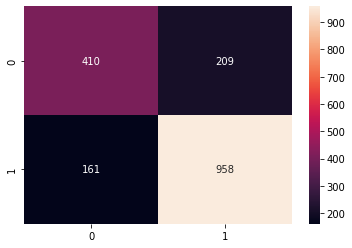

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')